In [6]:
import numpy as np
import uproot
import pandas as pd
import cygno as cy
import os
# variable to pass
start_run=46638
end_run=46639
run_description = 'Standard'
reco_path0 = 'Run4/'
rebuild = False
# debug
verbose = False
run_description = None
# 
file_out_path = '/jupyter-workspace/cloud-storage/cygno-analysis/pkl2/'
BASE_URL = 'https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/'
reco_path = BASE_URL+'cygno-analysis/RECO/'+reco_path0
try:
    runInfo=cy.read_cygno_logbook(sql=True, tag='lngs', start_run=start_run, end_run=end_run, verbose=verbose)
    if verbose: print(runInfo)
except Exception as e:
    print('ERROR >>> {}'.format(e))

#runSel = runInfo.loc[runInfo.run_description.str.contains('Stability')]
if run_description:
    runSel = runInfo.loc[runInfo.run_description == run_description]
else:
    runSel = runInfo


for i, run in enumerate(runSel.run_number):

    print("analyzing run: ",run, str(runSel[runSel.run_number==run].run_description.values))

    #
    # caricamento o creazione del file plk
    #
    try:
        branch_data = {}
        parma_data = {}
        file_url = reco_path+'reco_run{:5d}_3D.root'.format(run)
        tf = uproot.open(file_url)
        names = tf["Events;1"].keys()

        for i, name in enumerate(names):
            var = tf["Events;1/"+name].array(library="np")
            if var[0].ndim == 0:
                branch_data[name] = np.hstack(var)
            else:
                branch_data[name] = var
        
        df = pd.DataFrame(branch_data)
        # df.to_pickle(file_out_name, compression={'method': 'gzip', 'compresslevel': 1})
        parma_data['run']=branch_data['run'][0] 
        names = tf["Reco_params;1"].keys()
        for i, name in enumerate(names):
            var = tf["Reco_params;1/"+name].array(library="np")
            parma_data[name]=var
        dp = pd.DataFrame(parma_data)
    except Exception as e:
        print('ERROR >>> {}'.format(e))
        continue

print("DONE")

analyzing run:  46638 ['Stability']
DONE


In [7]:
df

,run,event,pedestal_run,cmos_integral,cmos_mean,cmos_rms,t_DBSCAN,t_variables,lp_len,t_pedsub,...,sc_lgaussmean,sc_lgausssigma,sc_lchi2,sc_lstatus,Lime_pressure,Atm_pressure,Lime_temperature,Atm_temperature,Humidity,Mixture_Density
0,46638,0,46638,4290576.5,0.808259,2.052739,0.003212,0.000006,77.0,0.015014,...,[],[],[],[],0.921127,0.913915,21.180058,21.292858,-4.864234,1.420115
1,46638,1,46638,4283013.5,0.806835,2.051062,0.002397,0.000005,52.0,0.013410,...,[],[],[],[],0.921127,0.913915,21.180058,21.292858,-4.864234,1.420115
2,46638,2,46638,4260047.0,0.802508,2.045364,0.002713,0.000005,110.0,0.012118,...,[],[],[],[],0.921127,0.913915,21.180058,21.292858,-4.864234,1.420115
3,46638,3,46638,4259464.0,0.802398,2.044078,0.002177,0.000005,47.0,0.012144,...,[],[],[],[],0.921127,0.913915,21.180058,21.292858,-4.864234,1.420115
4,46638,4,46638,4279843.0,0.806237,2.047474,0.104436,0.189049,86.0,0.013198,...,[10.552761],[5.301038],[3.9898305],[3.0],0.921127,0.913915,21.180058,21.292858,-4.864234,1.420115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,46638,101,46638,4260575.5,0.802608,2.052403,0.001978,0.000004,48.0,0.008665,...,[],[],[],[],0.921083,0.914231,21.179092,21.349154,-4.844372,1.419947
102,46638,102,46638,4327545.0,0.815223,2.066425,0.084119,0.007648,100.0,0.009188,...,[59.735577],[17.01266],[15.68066],[3.0],0.921083,0.914231,21.179092,21.349154,-4.844372,1.419947
103,46638,103,46638,4271643.5,0.804693,2.051990,0.002148,0.000003,87.0,0.009014,...,[],[],[],[],0.921083,0.914231,21.179092,21.349154,-4.844372,1.419947
104,46638,104,46638,4314738.0,0.812811,2.062001,0.002349,0.000005,60.0,0.014424,...,[],[],[],[],0.921083,0.914231,21.179092,21.349154,-4.844372,1.419947


In [8]:
dp

,run,camera_mode,pmt_mode,rebin,nsigma,min_neighbors_average,cimax,npixx,xmin,xmax,...,ymax,dbscan_eps,dbscan_minsamples,dir_radius,dir_min_accuracy,dir_minsamples,dir_thickness,time_threshold,max_attempts,isolation_radius
0,46638,1,0,4,0.6,1.2,5000,2304,0,2304,...,2054,12.0,20.0,28.0,0.95,12.0,6.5,300.0,3.0,5.0


In [51]:
%run ../env.ipynb

In [66]:
import mysql.connector
connection = mysql.connector.connect(
      host=os.environ['MYSQL_IP'],
      user=os.environ['MYSQL_USER'],
      password=os.environ['MYSQL_PASSWORD'],
      database=os.environ['MYSQL_DATABASE'],
      port=int(os.environ['MYSQL_PORT'])
)

def update_sql_value(connection, table_name, column_element, value, verbose=False):
    if isinstance(value, str):
        svalue="\""+value+"\""
    else:
        svalue=str(value)
    sql = "UPDATE `"+table_name+"` SET `"+column_element+"` = "+svalue+" WHERE 1;"
    if verbose: print(sql)
    try:
        mycursor = connection.cursor()
        mycursor.execute(sql)
        connection.commit()
        if verbose: print(mycursor.rowcount, "Update done")
        mycursor.close()
        return 0
    except Exception as e:
        print('ERROR >>> SQL update {}'.format(e))
        return 1

def start2epoch(sql_Log, run):
    from datetime import datetime
    date = str(sql_Log[sql_Log.run_number==run].start_time.values[0])
    utc_time = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.000000000")
    epoch_time = (utc_time - datetime(1970, 1, 1)).total_seconds()
    return epoch_time
    
    
def sql2df(url="http://lnf.infn.it/~mazzitel/php/cygno_sql_query.php?site=lnf&db=gm_data"):
    import requests
    r = requests.get(url, verify=False)
    df = pd.read_json(url)
    return df

def push_update_panda_table_sql(connection, table_name, df, verbose=False):

    try:
        mycursor=connection.cursor()
        mycursor.execute("SHOW TABLES LIKE '"+table_name+"'")
        result = mycursor.fetchone()
        if not result:
            cols = "`,`".join([str(i) for i in df.columns.tolist()])
            db_to_crete = "CREATE TABLE `"+table_name+"` ("+' '.join(["`"+x+"` REAL," for x in df.columns.tolist()])[:-1]+")"
            print ("[Table {:s} created into SQL Server]".format(table_name))
            mycursor = connection.cursor()
            mycursor.execute(db_to_crete)

        cols = "`,`".join([str(i) for i in df.columns.tolist()])

        for i,row in df.iterrows():
            sql = "INSERT INTO `"+table_name+"` (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s) " \
            "ON DUPLICATE KEY UPDATE "+", ".join(["`"+s+"`='"+str(df[s].values[0])+"'" for s in df.columns])
            if verbose: print(sql)
            mycursor.execute(sql, tuple(row.astype(str)))
            connection.commit()

        mycursor.close()
        return 0 
    except Exception as e:
        print('SQL ERROR --> ', e)
        return 1

5890.686899648058 2053.72 1.5406174229938905


0

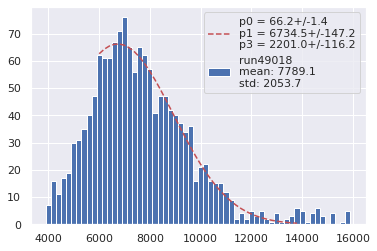

In [68]:
import pandas as pd
import cygno as cy
import numpy as np
def Gauss3(x, a0, x0, s0):
    import numpy as np
    return a0 * np.exp(-(x - x0)**2 / (2 * s0**2))

def plt_hist(data, run,  xmin=4000, xmax=16000, bins=60, verbose=False):
    import matplotlib.pyplot as plt
    import base64
    from json import dump
    import numpy as np
    import seaborn as sns
    from scipy.optimize import curve_fit
    sns.set()


    stat = data[(data>xmin) & (data<xmax)].mean(), data[(data>xmin) & (data<xmax)].std()
    fig,ax = plt.subplots()

    y,x = np.histogram(data, range=(xmin,xmax), bins = bins)
    x=x[:-1]
    w = abs(x[1] - x[0])
    xfmin=stat[0]-0.6*stat[1]/(stat[0]/12000)
    print(xfmin, stat[1], 1/(stat[0]/12000))
    xfmax=stat[0]+3*stat[1]

    popt, pcov = curve_fit(Gauss3,x[(x>xfmin) & (x<xfmax)], y[(x>xfmin) & (x<xfmax)], 
                           p0=[500, stat[0], stat[1]])
    perr = np.sqrt(np.diag(pcov))

    ax.bar(x,y, width=w, label='run{}\nmean: {:.1f}\nstd: {:.1f}'.format(run,stat[0], stat[1]))
    ax.plot(x[(x>xfmin) & (x<xfmax)], Gauss3(x[(x>xfmin) & (x<xfmax)], *popt), 'r--', 
            label='p0 = {:.1f}+/-{:.1f}\np1 = {:.1f}+/-{:.1f}\np3 = {:.1f}+/-{:.1f}'\
            .format(popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))


    ax.legend()
    plt.savefig('/tmp/fe.png')
    if verbose: plt.show()
    with open('/tmp/fe.png', 'rb') as f:
        img_bytes = f.read()
    f.close()
    img_base64 = base64.b64encode(img_bytes).decode('utf-8')
    if verbose: print(img_base64)

    del fig, ax, data
    return img_base64, stat, popt, perr

run = 49018
run_name = '/jupyter-workspace/cloud-storage/cygno-analysis/pkl/'+'reco_run{0:05d}_3D.pkl.gz'.format(run)
dfall=pd.read_pickle(run_name, compression={'method': 'gzip'})
img64,stat1, popt1, perr1 = plt_hist(np.hstack(dfall["sc_integral"]), run, xmin=4000, xmax=16000, bins=60, verbose=False)
# update_sql_value(connection, "tmpTable", "peak_fe_1", popt1[1], verbose=False)
# update_sql_value(connection, "tmpTable", "epoch_fe_1", start2epoch(cy.read_cygno_logbook(sql=True, tag='lngs', start_run=run, end_run=run+1, verbose=False), run), verbose=False)

In [10]:
def push_panda_table_sql(connection, table_name, df):

    try:
        mycursor=connection.cursor()
        mycursor.execute("SHOW TABLES LIKE '"+table_name+"'")
        result = mycursor.fetchone()
        if not result:
            cols = "`,`".join([str(i) for i in df.columns.tolist()])
            db_to_crete = "CREATE TABLE `"+table_name+"` ("+' '.join(["`"+x+"` REAL," for x in df.columns.tolist()])[:-1]+")"
            print ("[Table {:s} created into SQL Server]".format(table_name))
            mycursor = connection.cursor()
            mycursor.execute(db_to_crete)

        cols = "`,`".join([str(i) for i in df.columns.tolist()])

        for i,row in df.iterrows():
            sql = "INSERT INTO `"+table_name+"` (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s) " \
            "ON DUPLICATE KEY UPDATE "+", ".join(["`"+s+"`="+str(dv[s].values[0]) for s in df.columns])
            mycursor.execute(sql, tuple(row.astype(str)))
            connection.commit()

        mycursor.close()
        return 0 
    except Exception as e:
        print('SQL ERROR --> ', e)
        return 1

In [70]:

dv = sql2df(url="http://lnf.infn.it/~mazzitel/php/cygno_sql_query.php?db=tmpTable")

In [71]:
dv

,epoch_fe_1,peak_fe_1,epoch_fe_2,peak_fe_2,epoch_fe_3,peak_fe_3,epoch_fe_4,peak_fe_4,epoch_fe_5,peak_fe_5,image_fe_1,image_fe_2,image_fe_3,image_fe_4,image_fe_5,image_scan_fe
0,1708598301,6734.542128,1708598435,9591.66947,1708598587,11289.703745,1708598725,12294.781208,1708598920,12665.76486,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,iVBORw0KGgoAAAANSUhEUgAAA+gAAAH0CAYAAACuKActAA...


0

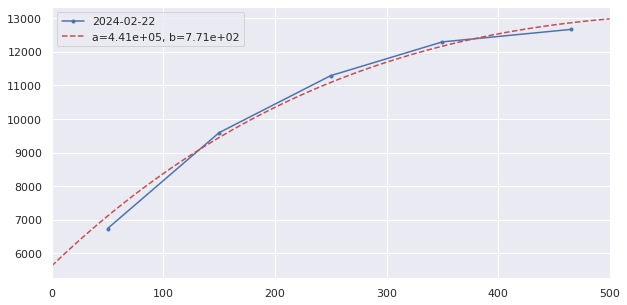

In [74]:


def scan_fit(x, a, b):
    import numpy as np
    return a * (1 - np.exp(-(x + 142.26) / (-0.02 * a + 19897.75) )) * np.exp(-x / b)

def scan_plt(dv, verbose=False):
    import matplotlib.pyplot as plt
    import base64
    from json import dump
    import numpy as np
    import seaborn as sns
    from scipy.optimize import curve_fit
    import datetime
    
    sns.set()
    try:
        fig,ax = plt.subplots(figsize=(10,5))
        x = [50.0, 150.0, 250.0, 350.0, 465.0]
        y = [dv.peak_fe_1.values[0], dv.peak_fe_2.values[0], dv.peak_fe_3.values[0], 
             dv.peak_fe_4.values[0], dv.peak_fe_5.values[0]]
        label = datetime.datetime.fromtimestamp(dv.epoch_fe_3).strftime('%Y-%m-%d')

        ax.plot(x,y, 'b.-', label=label)
        ax.legend()
        x1 = np.linspace(0,500, 100)
        popt, pcov = curve_fit(scan_fit,x,y, p0=[450000, 700])
        perr = np.sqrt(np.diag(pcov))
        y1 = scan_fit(x1, *popt)
        ax.plot(x1,y1, 'r--', label='a={:.2e}, b={:.2e}'.format(popt[0], popt[1]))
        ax.legend()

        ax.set_xlim(0,500)
        plt.savefig('/tmp/fe.png')
        if verbose: plt.show()
        with open('/tmp/fe.png', 'rb') as f:
            img_bytes = f.read()
        f.close()
        img_base64 = base64.b64encode(img_bytes).decode('utf-8')
        if verbose: print(img_base64)
        del fig, ax
        return img_base64, popt, perr
    except Exception as e:
        print('ERROR scan fit error {}'.format(e))
        return False, [0,0], [0,0]

img_base64, popt, perr = scan_plt(dv)
update_sql_value(connection, "tmpTable", "image_scan_fe", img_base64, verbose=False)

In [84]:
dv.peak_fe_1.values[0]

7326.0710617615605

In [14]:
dv.iloc[:, : 10].columns

Index(['epoch_fe_1', 'peak_fe_1', 'epoch_fe_2', 'peak_fe_2', 'peak_fe_3',
       'epoch_fe_3', 'epoch_fe_4', 'peak_fe_4', 'epoch_fe_5', 'peak_fe_5'],
      dtype='object')

In [15]:
", ".join(["`"+s+"`="+str(dv[s].values[0]) for s in dv.iloc[:, : 10].columns])

'`epoch_fe_1`=1708082103, `peak_fe_1`=7326.0710617615605, `epoch_fe_2`=1708082232, `peak_fe_2`=9544.098814900355, `peak_fe_3`=11094.202805446035, `epoch_fe_3`=1708082362, `epoch_fe_4`=1708082492, `peak_fe_4`=11924.923727703812, `epoch_fe_5`=1708082637, `peak_fe_5`=12430.642260513763'

In [40]:
dv.epoch_fe_1=dv.epoch_fe_1+1


In [41]:
dv.epoch_fe_1

0    1708082104
Name: epoch_fe_1, dtype: int64

In [51]:
push_panda_table_sql(connection, 'tmpTableHist', dv.iloc[:, : 10])

0

In [62]:
import datetime
import time
tn = datetime.datetime.fromtimestamp(time.time()).strftime('%H')
if tn=='23':
    print('so qui')
    dv = sql2df(url="http://lnf.infn.it/~mazzitel/php/cygno_sql_query.php?db=tmpTable")
    dh = sql2df(url="http://lnf.infn.it/~mazzitel/php/cygno_sql_query.php?db=tmpTableHist")
    tv = datetime.datetime.fromtimestamp(dv.epoch_fe_3).strftime('%Y-%m-%d')
    th = datetime.datetime.fromtimestamp(dh.iloc[-1].epoch_fe_3).strftime('%Y-%m-%d')
    if not tv==th:
        push_panda_table_sql(connection, 'tmpTableHist', dv.iloc[:, : 10])
        print("history updated")

In [63]:
tn

'19'

In [57]:
dh.iloc[-1].epoch_fe_3

1708082362.0

In [114]:
tn = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d')

In [115]:
dv['date']=tn

In [116]:
dv

,epoch_fe_1,peak_fe_1,epoch_fe_2,peak_fe_2,epoch_fe_3,peak_fe_3,epoch_fe_4,peak_fe_4,epoch_fe_5,peak_fe_5,image_fe_1,image_fe_2,image_fe_3,image_fe_4,image_fe_5,date
0,1708082103,7326.071062,1708082232,9544.098815,1708082362,11094.202805,1708082492,11924.923728,1708082637,12430.642261,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,2024-02-17


In [118]:
dv.iloc[:, : 10]+dv['date']

,0,epoch_fe_1,epoch_fe_2,epoch_fe_3,epoch_fe_4,epoch_fe_5,peak_fe_1,peak_fe_2,peak_fe_3,peak_fe_4,peak_fe_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
dv = sql2df(url="http://lnf.infn.it/~mazzitel/php/cygno_sql_query.php?db=tmpTable")
dv = dv.iloc[:, : 10]
dv['date']=tn
dv

,epoch_fe_1,peak_fe_1,epoch_fe_2,peak_fe_2,epoch_fe_3,peak_fe_3,epoch_fe_4,peak_fe_4,epoch_fe_5,peak_fe_5,date
0,1708082103,7326.071062,1708082232,9544.098815,1708082362,11094.202805,1708082492,11924.923728,1708082637,12430.642261,2024-02-17


In [42]:

def self_updete_history(connection, verbose=False):
    import datetime
    import time
    dv = sql2df(url="http://lnf.infn.it/~mazzitel/php/cygno_sql_query.php?db=tmpTable")
    img_base64, popt, perr = scan_plt(dv)
    if img_base64:
        update_sql_value(connection, "tmpTable", "image_scan_fe", img_base64, verbose)
    dv = dv.iloc[:, : 10] 
    dv['data']=datetime.datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d")
    dv['par0']=popt[0]
    dv['par1']=popt[1]
    if not (push_update_panda_table_sql(connection, 'tmpTableHist', dv, verbose)):
        print("history updated")
    else:
        print("ERROR in history updated")

UPDATE `tmpTable` SET `image_scan_fe` = "iVBORw0KGgoAAAANSUhEUgAAAtAAAAFoCAYAAAB+JswZAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAABU9ElEQVR4nO3dd3hUVf7H8ffMZGZSJ71MQg01gHRFUUFABRWwABYs69p115+sZWV1V1x7cNe2FmzrqmtdsRFdQcSCHURBCFJCC+m9J5OZub8/wkaRkkwgmUzyeT2Pj5k599753pxM5sPJueeaDMMwEBERERGRVjH7uwARERERkUCiAC0iIiIi4gMFaBERERERHyhAi4iIiIj4QAFaRERERMQHCtAiIiIiIj5QgBYRERER8YECtIiIiIiIDxSgRURERER8oAAtIiIiIuIDBWgRERERER8oQIuIiIiI+EABWkRERETEBwrQIiIiIiI+UIAWEREREfGBArSIiIiIiA8UoEVEREREfKAALSIiIiLiAwVoEREREREfKECLiIiIiPhAAVpERERExAcK0CIiIiIiPlCAFhERERHxgQK0iIiIiIgPFKBFRERERHygAC0iIiIi4gMFaBERERERHyhAi4iIiIj4QAFaRERERMQHCtAiIiIiIj5QgBYRERER8YECtIiIiIiIDxSgRURERER8oAAtIiIiIuIDBWgRERERER8oQIuIiIiI+EABWkRERETEBwrQIiIiIiI+UIAWEREREfGBArSIiIiIiA8UoEVEREREfKAALSIiIiLiAwVoEREREREfBPm7gO6krKwGr9fwdxnSBrGx4ZSUVPu7DGkD9V1gU/8FLvVd4DKbTURHh/m7jE5NAboDeb2GAnQAU98FLvVdYFP/BS71nXRVmsIhIiIiIuIDBWgRERERER8oQIuIiIiI+EBzoP3M43FTVlaE2+3ydyl

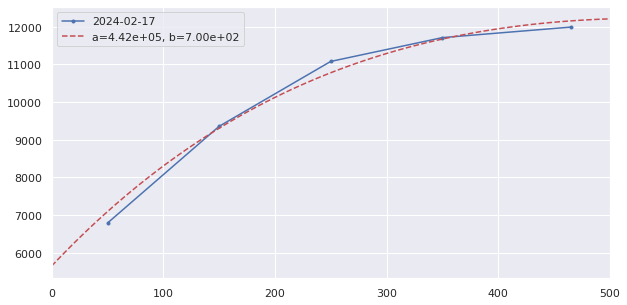

In [43]:
self_updete_history(connection, verbose=True)

In [20]:
import datetime
import time
datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d 00:00:00')

'2024-02-17 00:00:00'